In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
dTrain = pd.read_csv('Titanic_training_set.csv').drop(dTrain.columns[0],axis=1)
dTest = pd.read_csv('Titanic_test_set.csv').drop(dTest.columns[0],axis=1)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S', 'Title_Capt.', 'Title_Col.', 'Title_Don.',
       'Title_Dr.', 'Title_Lady.', 'Title_Major.', 'Title_Master.',
       'Title_Miss.', 'Title_Mlle.', 'Title_Mme.', 'Title_Mr.', 'Title_Mrs.',
       'Title_Ms.', 'Title_Rev.', 'Title_Sir.', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T'],
      dtype='object')

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

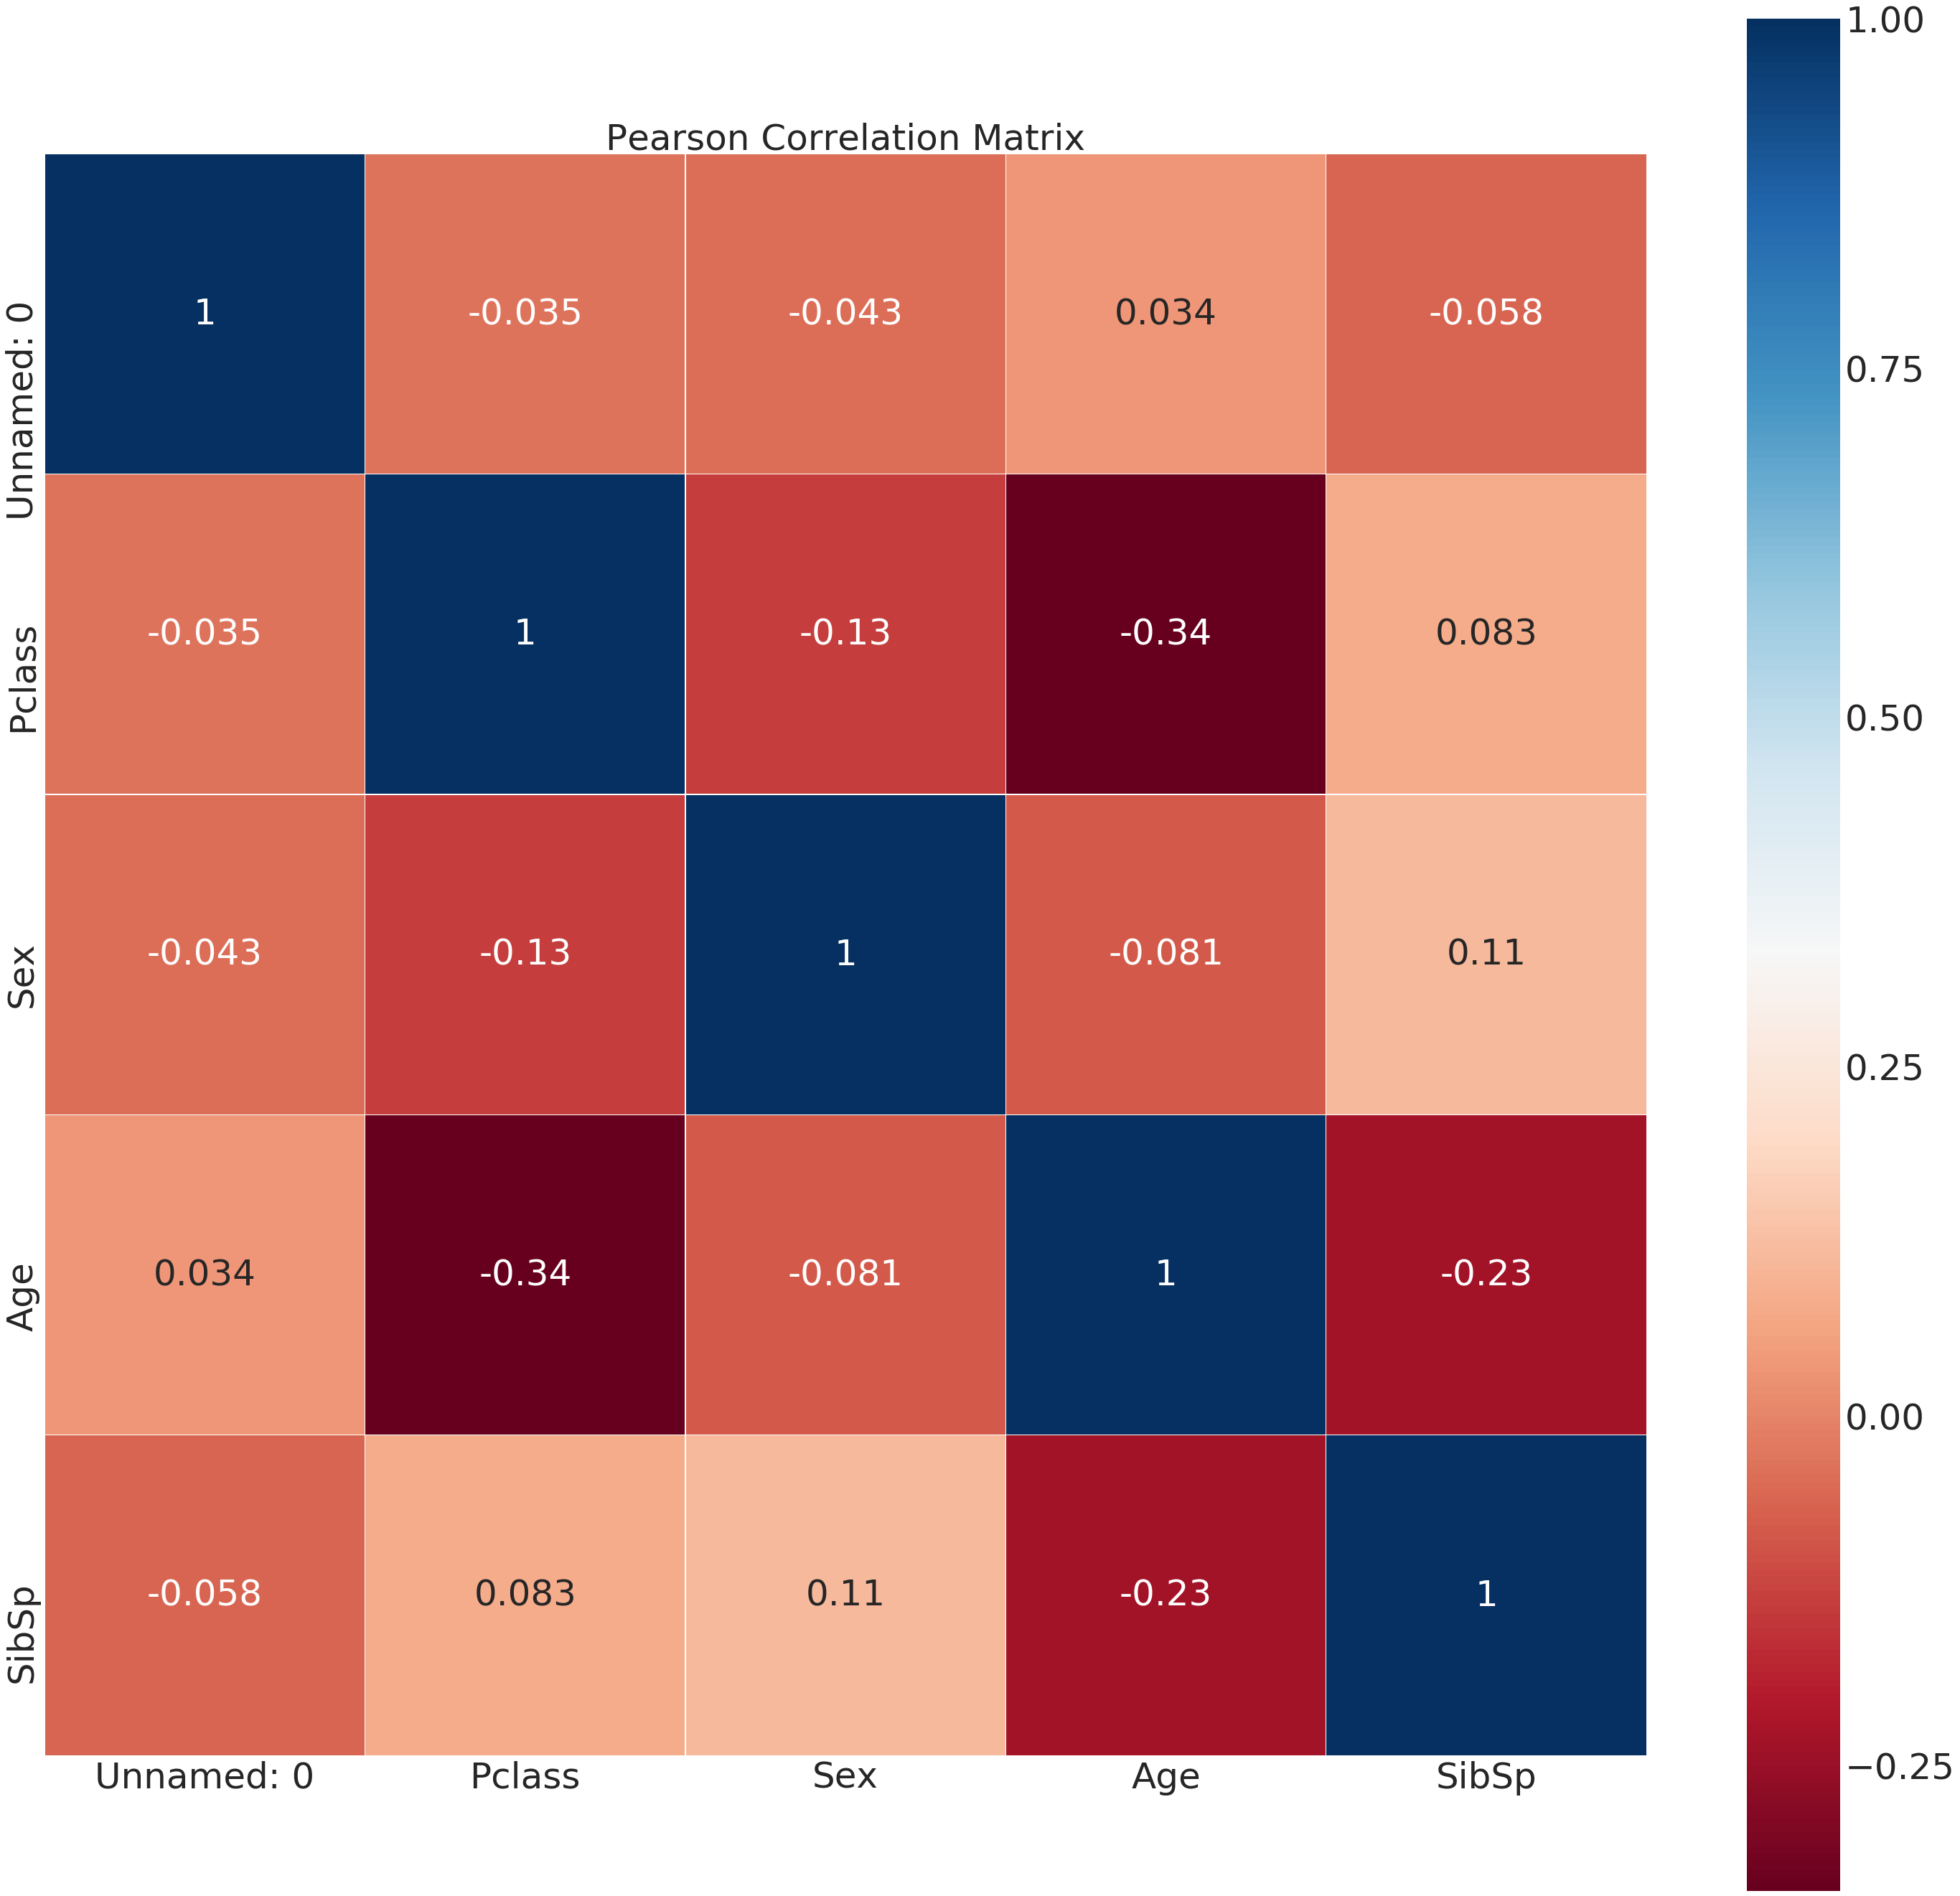

In [176]:
colormap = plt.cm.RdBu
plt.figure(figsize=(50,48))
plt.title('Pearson Correlation Matrix', size=50)
sns.heatmap(dTrain[dTrain.columns[0:5]].astype(float).corr(),linewidths=0.1, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':50})

In [192]:
#dTrain.columns
X = dTrain.drop('Survived', axis=1)
y = dTrain['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(copy=False)
scaler.fit_transform(X_train) 
scaler.fit_transform(X_test)

array([[1.        , 0.        , 0.34656949, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.34656949, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.25860769, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.22090978, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.19577783, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.28373963, ..., 0.        , 0.        ,
        0.        ]])

In [194]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
svc.predict(X_test)
svc.score(X_test, y_test)

0.7089552238805971

In [195]:
print(classification_report(y_test,svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.77      0.77      0.77       173
          1       0.59      0.59      0.59        95

avg / total       0.71      0.71      0.71       268



In [196]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.predict(X_test)
print(knn.score(X_test, y_test))
print(classification_report(y_test, knn.predict(X_test)))

0.7052238805970149
             precision    recall  f1-score   support

          0       0.77      0.78      0.77       173
          1       0.59      0.57      0.58        95

avg / total       0.70      0.71      0.70       268



In [206]:
#select best knn

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_train, y_train)
knn_acc = pd.DataFrame(index = range(100), columns=['n','Acc'])

j=0
for i in range(1,101):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train_knn, y_train_knn)
    knn_acc.iloc[j,0] = i
    knn_acc.iloc[j,1] = knn_i.score(X_test_knn, y_test_knn)
    j+=1

n             3
Acc    0.762821
Name: 2, dtype: object


/home/seb/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/seb/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/seb/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/seb/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/seb/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not fo

/home/seb/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/seb/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/seb/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/seb/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/seb/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not fo

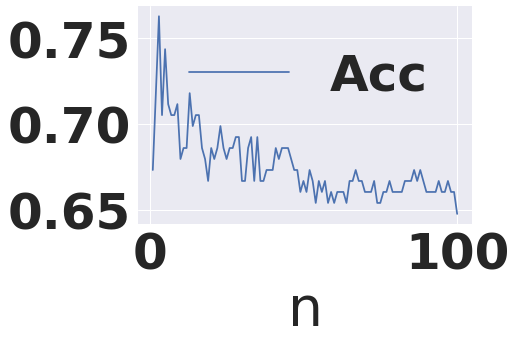

In [207]:
import matplotlib as mpl
font = {'size': 10}

mpl.rc('font', **font)


print(knn_acc.loc[knn_acc['Acc'].astype(float).idxmax()])
knn_acc.plot(x='n', y='Acc')

In [150]:
%matplotlib inline

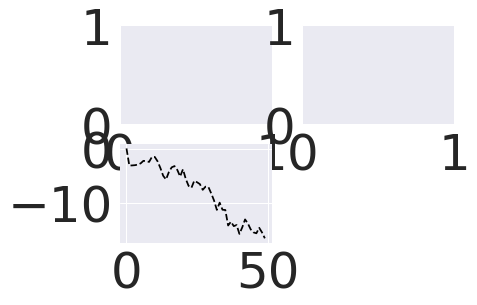

In [170]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

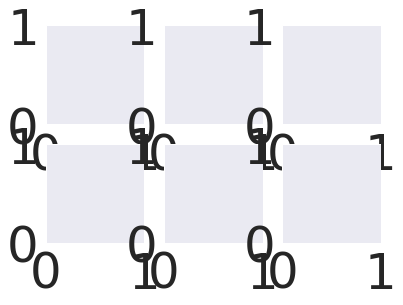

In [171]:
fig, axes = plt.subplots(2, 3)

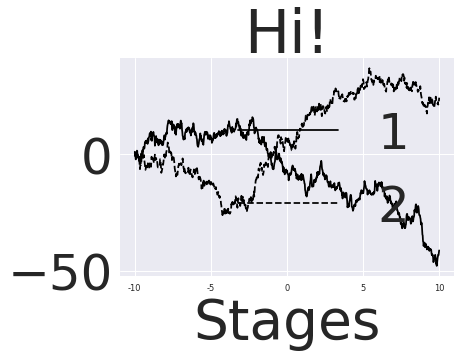

In [172]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(), 'k',label='1')
ax.plot(np.random.randn(1000).cumsum(),  'k--',label='2')
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels([-10, -5, 0, 5, 10], fontsize ='small')
#ax.set_title('My first plot')
#ax.set_xlabel('CumSum')
props = {'title':'Hi!','xlabel':'Stages'}
ax.set(**props)
ax.legend(loc='best')